In [2]:
from IPython.display import HTML, display

In [3]:
display(HTML("""<h2>Making Predictions with ARIMA using historical data</h2> <p>In this model, I would be implementing a simple ARIMA model for a single charging station and then multiple charging stations in the same location</p>"""))

In [ ]:
# Making Predictions with ARIMA using historical data from only one charging station

In [ ]:
# Install the required packages

In [104]:
pip install pandas numpy matplotlib seaborn statsmodels scikit-learn

In [ ]:
# Import the required packages

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
import warnings
import os as os

warnings.filterwarnings("ignore")

In [3]:
#Load the data from the local file

In [13]:
data = pd.read_csv('./caltech_model_data/2-39-123-557.csv')

In [ ]:
# Display the first few rows of the dataframe

In [14]:
print(data.head())

     month  siteID     stationID             timezone spaceID  kWhDelivered  \
0  2018-05       2  2-39-123-557  America/Los_Angeles  CA-503       224.290   
1  2018-06       2  2-39-123-557  America/Los_Angeles  CA-503       171.030   
2  2018-07       2  2-39-123-557  America/Los_Angeles  CA-503       272.148   
3  2018-08       2  2-39-123-557  America/Los_Angeles  CA-503       272.058   
4  2018-09       2  2-39-123-557  America/Los_Angeles  CA-503       250.167   

   MinTemp  MaxTemp    AvgTemp  AvgPrecipitation  AvgHumidity  AvgWindSpeed  
0       11       32  18.290323          0.006855    56.451613      9.504032  
1       14       32  22.433333          0.000000    50.483333      9.220833  
2       17       44  27.548387          0.000000    46.762097      8.536290  
3       18       38  26.516129          0.000000    47.411290      8.705645  
4       17       35  24.533333          0.000000    49.204167      7.287500  


In [15]:
# Convert the month to datetime format and set it as the index

In [17]:
data['Month'] = pd.to_datetime(data['month'])
data.set_index('Month', inplace=True)

In [18]:
# Visualize the trends over time for kwhDelivered

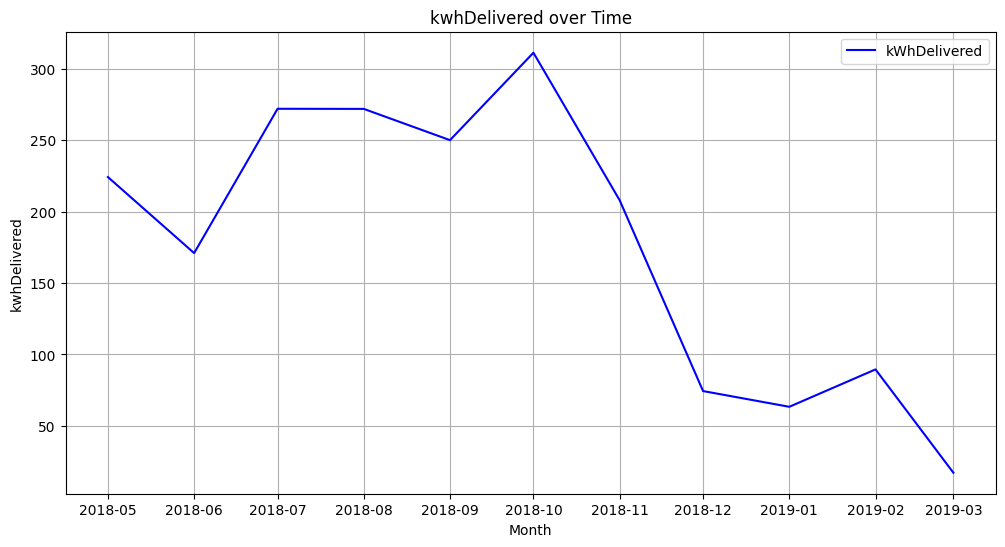

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['kWhDelivered'], label='kWhDelivered', color='b')
plt.title('kwhDelivered over Time')
plt.xlabel('Month')
plt.ylabel('kwhDelivered')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Prepare the data for ARIMA
# ARIMA requires univariate data, so we'll focus on the kwhDelivered series

In [28]:
kwh_series = data['kWhDelivered']

In [29]:
# Split data into training and validation sets

In [33]:
train_size = int(len(kwh_series) * 0.8)
train, validation = kwh_series[:train_size], kwh_series[train_size:]

In [31]:
# Fit ARIMA model

In [34]:
model = ARIMA(train, order=(5, 1, 0))  # (p,d,q) order
model_fit = model.fit()

In [35]:
# Make predictions using the trained model

In [37]:
predictions = model_fit.forecast(steps=len(validation))

In [38]:
# Evaluate the model using Mean Square Error

In [76]:
mse = mean_squared_error(validation, predictions)
mae = mean_absolute_error(validation, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 54933.13089684413
Mean Absolute Error: 183.7729870545505


In [41]:
# Plot the predictions vs actual values

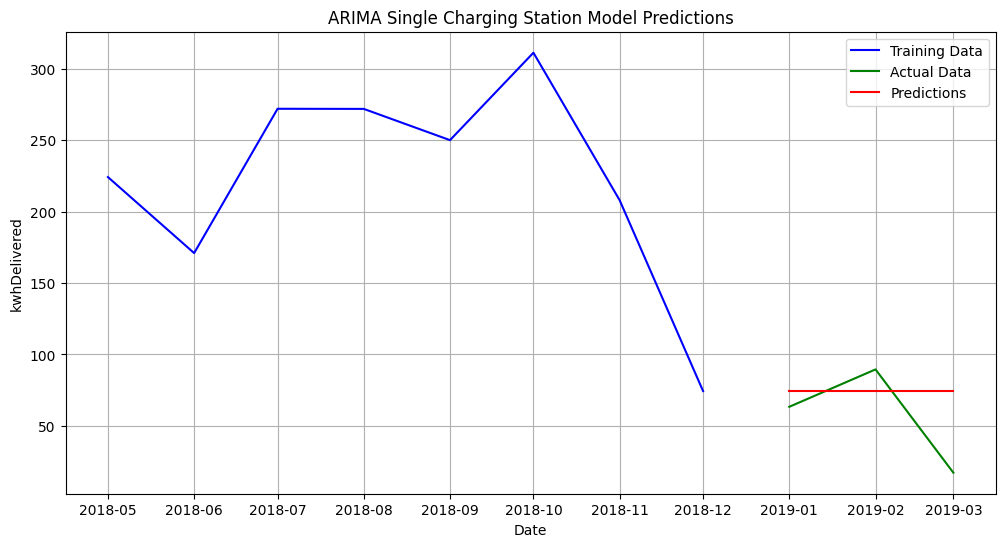

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data', color='b')
plt.plot(validation.index, validation, label='Actual Data', color='g')
plt.plot(validation.index, predictions, label='Predictions', color='r')
plt.title('ARIMA Single Charging Station Model Predictions')
plt.xlabel('Date')
plt.ylabel('kwhDelivered')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Print summary of the model

In [44]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           kWhDelivered   No. Observations:                    8
Model:                 ARIMA(5, 1, 0)   Log Likelihood          -151351166.914
Date:                Wed, 17 Jul 2024   AIC                      302702345.828
Time:                        16:17:37   BIC                      302702345.504
Sample:                    05-01-2018   HQIC                     302702341.817
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       7.729e-07   1.05e-07      7.345      0.000    5.67e-07    9.79e-07
ar.L2       -1.57e-08   7.43e-08     -0.211      0.833   -1.61e-07     1.3e-07
ar.L3      -2.078e-08   4.44e-08     -0.468      0.6

In [46]:
## Making Predictions using the data from all the charging stations in a location

In [48]:
# Define the directory containing the CSV files

In [49]:
directory = './caltech_model_data'

In [50]:
# Load and combine all CSV files into a single dataframe

In [51]:
combined_data = pd.DataFrame()

In [99]:
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        # Load the data
        data = pd.read_csv(filepath)
        combined_data = pd.concat([combined_data, data], axis=0)

In [55]:
# Convert the month to datetime format and set it as the index

In [100]:
combined_data['Month'] = pd.to_datetime(combined_data['month'])
combined_data.set_index('Month', inplace=True)

In [56]:
# Visualize the combined data for kwhDelivered

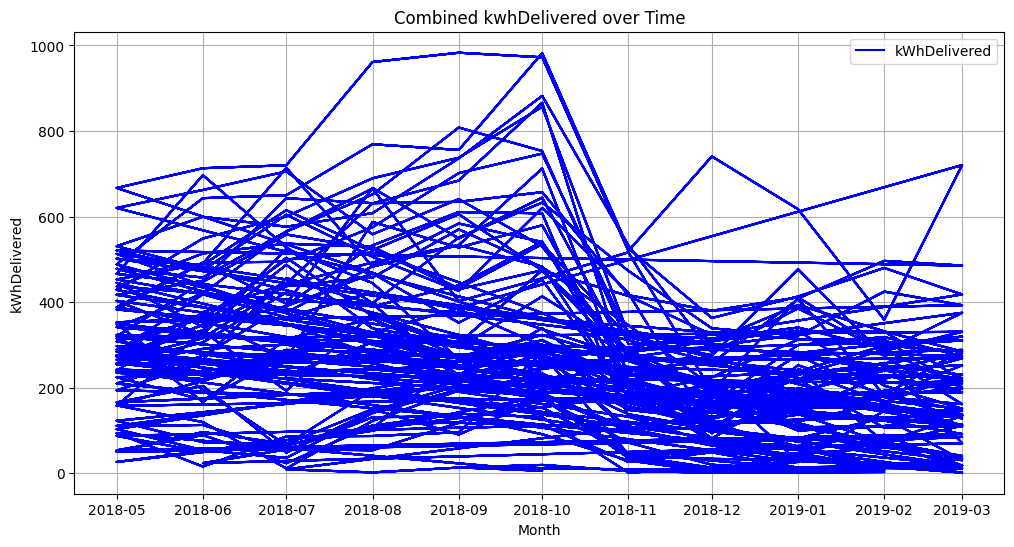

In [101]:
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['kWhDelivered'], label='kWhDelivered', color='b')
plt.title('Combined kwhDelivered over Time')
plt.xlabel('Month')
plt.ylabel('kWhDelivered')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
# Prepare the data for ARIMA
# ARIMA requires univariate data, so we'll focus on the kwhDelivered series

In [86]:
kwh_series = combined_data['kWhDelivered']

In [64]:
# Split data into training and testing sets

In [87]:
train_size = int(len(kwh_series) * 0.8)
train, validation = kwh_series[:train_size], kwh_series[train_size:]

In [67]:
# Fit the ARIMA model

In [88]:
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

In [70]:
# Make a prediction

In [90]:
predictions = model_fit.forecast(steps=len(test))

In [72]:
# Evaluate the model

In [91]:
mse = mean_squared_error(validation, predictions)
mae = mean_absolute_error(validation, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 54933.13089684413
Mean Absolute Error: 183.7729870545505


In [81]:
# Plot of predictions vs actual values

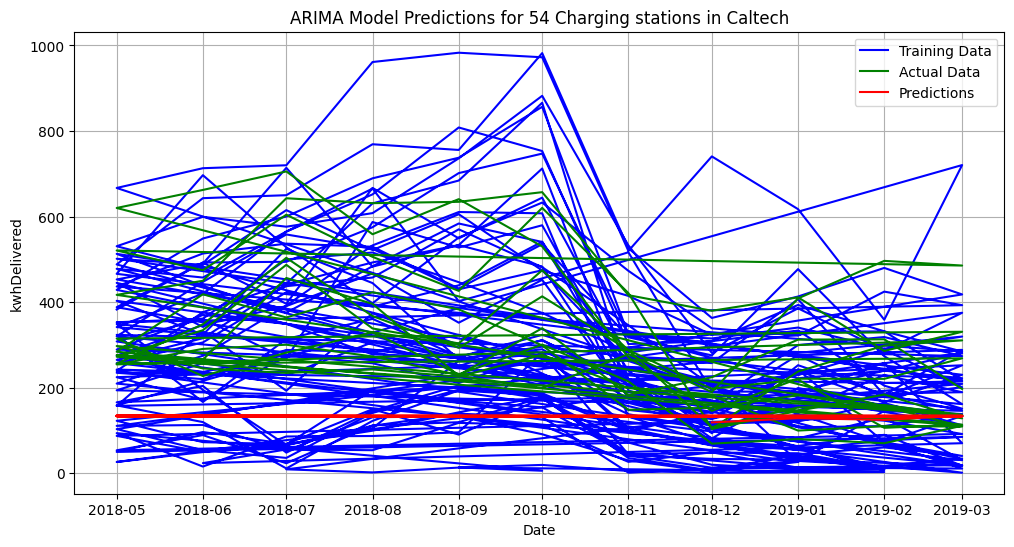

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data', color='b')
plt.plot(test.index, test, label='Actual Data', color='g')
plt.plot(test.index, predictions, label='Predictions', color='r')
plt.title('ARIMA Model Predictions for 54 Charging stations in Caltech')
plt.xlabel('Date')
plt.ylabel('kwhDelivered')
plt.legend()
plt.grid(True)
plt.show()


In [84]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           kWhDelivered   No. Observations:                  454
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2896.073
Date:                Wed, 17 Jul 2024   AIC                           5804.147
Time:                        16:53:05   BIC                           5828.842
Sample:                             0   HQIC                          5813.877
                                - 454                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0918      0.054     -1.712      0.087      -0.197       0.013
ar.L2         -0.0489      0.062     -0.795      0.427      -0.169       0.072
ar.L3         -0.0080      0.048     -0.167      0.8